---
title: "Computer Science to Machine Learning - An intuitive understanding of ML for coders (Part 1)"
author: "Jax Bulbrook"
date: "2023-08-21"
categories: [tutorial]
---

# Summary
This tutorial is meant to give an intuitive explanation of machine learning for those that are already familiar with computer science, specifically Python and OOP. If you aren't, I would highly suggest learning to code before learning AI, as it will be very challenging otherwise. Check out the amazing [100 Days of Python Course](https://100daysofpython.dev/) to do so. But this mini-course assumes no previous knowledge of the field. In fact, I was in the same position roughly a year ago, having gotten interested in ML with the release of ChatGPT. I couldn't possibly imagine how they are able to program so many different outputs, or how they teach a computer to do it for them. Roughly a year later and my path has deviated several times, as there are so many resources out there it's hard to keep track. My list of links, videos, and books to read is over 500, and that is unsustainable for someone trying to transition from CS to the newly popular (and high paying) ML. I'm not at all good at math or theory, I prefer using code as an example, but in some cases there is a need to understand the underlying theory, for which I apologize in advance.

# Course outline
I am going to be documenting the various ideas on the journey to a career in Machine Learning, so this will probably be ongoing, but for now here is what you will learn:

1. An intuitive understanding of a neural network (this post)
2. Implementing a simple digit classifier with PyTorch
3. Behind the scenes: How Backpropogation works
4. A guide to the confusing aspects of the Transformer
5. How Stable Diffusion works
6. Tips to make your model better (dropout, layer norm, nonlinearity, etc)

# What is a neural network?
Neural networks are simply used to refer to a complex mathematical expression. It is a way to represent any function with a series of "parameters". For now, you can think of it as a black box, where you pass in information and get out the correct information. This neural network can have it's complexity increased or decreased, depending on the complexity of the relationship it needs to model. The reason it's so special, and the reason everyone cares so much about it, is that its a *universal function approximator*. So it could graph something as simple as x^2 or sin(x), yes, but it can also be expanded to anything you can put into a series of numbers.  
  
So what if you need to figure out if an image is a cat or a dog? Just convert each pixel to a number going from 0 (white) to 1 (black), and feed that in, to get the answer. We could manually figure this out, by writing some incredibly long function with thousands of different variables, but mathematicians would very quickly get tired of that. And how do you figure out what the numbers are? It makes no intuitive sense to us, but computers don't need intuition. The beauty of a neural network is that you can give it a bunch of data it needs to classify along with the result, and it will figure out how to do that. It does need some way of figuring out if it's right or wrong, though, or else it would just spit out random answers forever and think it's getting everything write.   
   
But how does this magical function approximator work? It's actually modelled after our own brains, which may be why it can now do many of the same things we can do. Here is a simple graph, one that can classify someone as male or female given their height and weight: ![A simple neural net](simple-nn.png)
It looks a bit confusing at first, but it's actually very simple. You start with an input layer, with your two numbers you are feeding it (weight and height). There is no need to transform these from our language (words) computer language (numbers) since they already are! Then, you have what's called a hidden layer. This goes in between the input and output layer, and it is used to give the model a bit more context. If we were only allowed to have one layer, then the weight and height would have to have some number that directly turns them into gender (1 or 0). It's a bit more complicated than that, so you give the model one (or many) extra layers to process the information a bit better. One is enough, but when you get to image classifiers like ResNet, they have up to 50 layers!  
To calculate h1 and h2, which is the data you then pass on as the new inputs to the next layer, you take some weights and a bias. In this case, the math for h1 would be `(weight*w1) + (height*w2) + b1`. If you aren't a math person, that's ok. You are basically taking the weight and height and multiplying them by some number to transform them more towards the number. In this case, the weight is probably in the triple digits, if in pounds, and the height is probably mid 50s in inches. This is a long way away from somehow changing it into a number from 0 to 1 for the gender, so we first need to multiply them by some number. In this case, it would be a very small number like 0.1 or even 0.01, which would turn 100 into 10 or 1 respectively. This is a bit closer to our number, which is why we use weights. Then we need some way to also give it the information from the height, which is calculated in the same way. We can add them together, but that may still not be enough (or too much). We also add a bias, which is just some set number, to make the numbers more standardized. In this case, the weight and height put together would proably go over 1, so the bias could be something like -1 to bring it back to a range of 0-1. And that's a basic Neural Network!  

# How would this work in a practical sense?
We are now going to be introduced into the power of PyTorch, one of many machine learning frameworks for Python. Most of them are roughly the same, so it doesn't matter what you start with, but this one is most popular in AI research and is growing in careers as well. You can follow along with this tutorial via [this Jupyter Notebook](https://github.com/Jax-Hax/quarto-blog/blob/main/posts/cs-to-ml-p1/index.ipynb). If you don't know what a Jupyter notebook is, it's basically a collection of code blocks that you can run 1 by 1 rather than executing a whole script at once. If you don't have VSCode, Jupyter Lab, or Jupyter Notebook installed on a local computer, you can run this in Kaggle as well, but I won't cover that here. We are going to be making a simple function classifier, to approximate things like sin(x) and x^2. This will help understand the basics, like datasets, training a neural network, and nonlinearity.

In [ ]:
# Step one, install the required libraries
!pip install pytorch numpy matplotlib # a ! before a line means run in the command line rather than in Python
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt # I had an error and had to also install ipywidgets in case you run into that
plt.style.use('_mpl-gallery')

In [7]:
# Some tuneable variables that will be explained later
# cpu or gpu
device = ("cuda" if torch.cuda.is_available() else "cpu")

# The following helper functions are just normal programming, with pyplot, so I won't go too far into detail

In [4]:
class Net(torch.nn.Module):
    def __init__(self, num_params=3):
        super().__init__()
        self.num_params = num_params
        self.params = torch.nn.Parameter(torch.randn(num_params) * 0.01)  # Manually initialize with small values
    def forward(self, x):
        y = torch.zeros_like(x)
        for idx in range(self.num_params):
            y += self.params[idx] * torch.pow(x, idx)
        return y

In [42]:
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [47]:
x = torch.linspace(-15, 15, 2000).unsqueeze(1)
y = torch.sin(x)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
for t in range(2000):
    optimizer.zero_grad()
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = F.mse_loss(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    
    loss.backward()
    optimizer.step()

99 0.3614107668399811
199 0.34806376695632935
299 0.3532806932926178
399 0.3499610722064972
499 0.3483750522136688
599 0.34798097610473633
699 0.34804192185401917
799 0.3481113314628601
899 0.3483879566192627
999 0.3488181233406067
1099 0.34910497069358826
1199 0.3490227162837982
1299 0.3482523262500763
1399 0.33550703525543213
1499 0.327591210603714
1599 0.32440435886383057
1699 0.32894811034202576
1799 0.34607040882110596
1899 0.32680436968803406
1999 0.3409467935562134


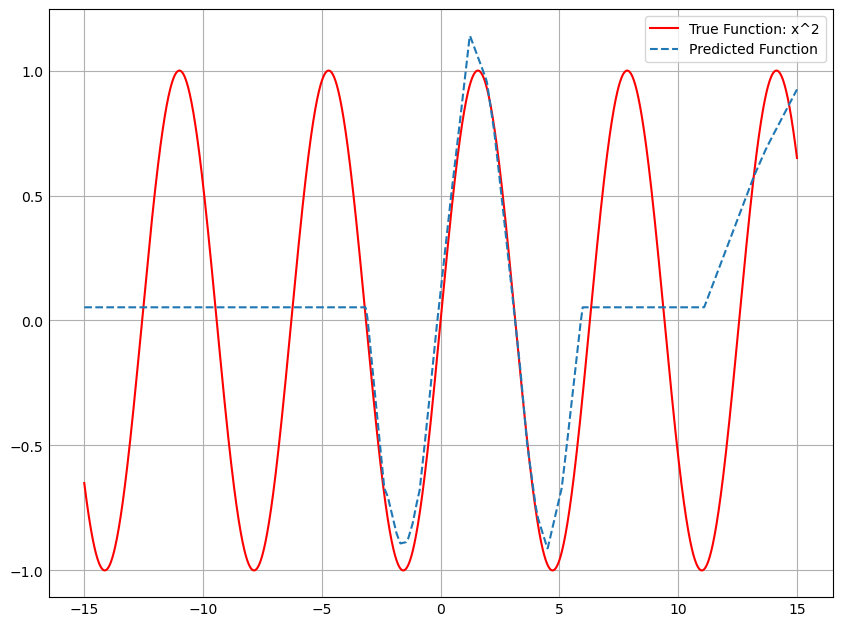

In [48]:
# Test the model
test_x = torch.linspace(-15, 15, 2000).unsqueeze(1)
predicted_y = model(test_x)

# Convert tensor data back to numpy arrays for plotting
test_x = test_x.numpy()
predicted_y = predicted_y.detach().numpy()
true_y = np.sin(test_x)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(test_x, true_y, "r-", label='True Function: x^2')
plt.plot(test_x, predicted_y, label='Predicted Function', linestyle='dashed')
plt.legend()
plt.show()